In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder, OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import gzip
import json

In [2]:
import pickle
infile = open('df_clothing_rev','rb')
new_dict = pickle.load(infile)
infile.close()

In [3]:
new_dict.head()

,category,description,title,brand,feature,rank,date,asin,image,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
2146505,"[Clothing, Shoes & Jewelry, Women, Shoes, Sand...",[Havaianas is a global leader in the sandals c...,Havaianas Women's Spring Sandal Flip-Flop,NaN,"[100% Synthetic, Imported, Rubber sole, Soft a...","1,037,103inClothing,ShoesJewelry(",5 star,B0155CVZH4,[https://images-na.ssl-images-amazon.com/image...,"[B0764K1N4X, B07G1BCLMG, B07F2QKYP6, B07B2CDRL...",$22.00 - $23.42,"class=""a-normal a-align-center a-spacing-smal...","[B07G1BCLMG, B01LXLLIY2, B07M87JCWL, B00OYSTNB...",NaN,NaN,NaN,NaN,NaN
2403386,"[Clothing, Shoes & Jewelry, Girls, Shoes, Flats]","[Leather, See Kai Run designs are sophisticate...",See Kai Run Kids' Ginger Ii Gold Mary Jane,NaN,"[100% Leather, Rubber sole, Classic mary jane ...","1,100,766inClothing,ShoesJewelry(",5 star,B01B3RHMMM,[https://images-na.ssl-images-amazon.com/image...,"[B01B6EI870, B0721XF31Z, B06XPPHG22, B06XPKPDW...",$24.00 - $52.00,"class=""a-normal a-align-center a-spacing-smal...","[B01B6EI870, B072KQPT5Y, B06WVB4VPS, B06XPPHG2...",NaN,NaN,NaN,NaN,NaN
399801,"[Clothing, Shoes & Jewelry, Women, Watches, Wr...",[Women's Museum classic watch that is defined ...,"Movado Women's 0606505 ""Museum"" Stainless Stee...",Movado,"[The epitome of contemporary style, this Movad...","4,497,976inClothing,ShoesJewelry(",Movado,B005G4LHLQ,[https://images-na.ssl-images-amazon.com/image...,"[B0007P4AV8, B01ARFW63Q, B005G4K4TC, B07GTMMG4...",NaN,NaN,[B077L3P1M8],NaN,NaN,NaN,NaN,NaN
1795818,"[Clothing, Shoes & Jewelry, Women, Clothing, L...",[SPANX Size Guide Super control that's comfy e...,SPANX Women's Shape My Day Open Bust Camisole,NaN,"[Nylon,Spandex, Imported, Hang Dry, SPANX Size...","489,447inClothing,ShoesJewelry(",5 star,B00TV2TF68,[https://images-na.ssl-images-amazon.com/image...,"[B0055X1NDK, B07BZFNXK7, B06Y3Y1FXJ, B07CCJ8RN...",$38.00 - $65.74,"class=""a-normal a-align-center a-spacing-smal...","[B07BZFNXK7, B07483DKBN, B06Y3Y1FXJ, B01AVBTVN...",NaN,NaN,NaN,NaN,NaN
1886347,"[Clothing, Shoes & Jewelry, Men, Accessories, ...","[, Give your trusty Oakley Split Jacket the tu...",Revant MaxGrip Rubber Kit for Oakley Split Jac...,Revant,"[Blue, Compatible with Oakley Split Jacket, Co...","800,461inClothing,ShoesJewelry(",5 star,B00WAIETE8,[https://images-na.ssl-images-amazon.com/image...,"[B07BZZ1DC6, B07CKLXR7Q, B07CRSLCJH, B073NQ1PC...",$12.00,"class=""a-normal a-align-center a-spacing-smal...","[B01GUL0DAY, B07BZZ1DC6, B00GVKPTYK, B01AXWTCG...",Sports & Outdoors,NaN,NaN,NaN,NaN


In [4]:
df_clothing_re = new_dict.dropna(how='any',subset= ['also_buy','description','title','rank','asin'],axis=0)

In [5]:
len(df_clothing_re)

7445

In [6]:
df_cleaned = df_clothing_re[['also_buy', 'also_view','asin', 'brand', 'description', 'details', 'feature', 
                                    'image', 'price', 'rank', 'title']]

In [7]:
# getting transaction dataset (also-bought items)
lst = []
for index,row in df_cleaned.iterrows():
    a = [row['asin'], *row['also_buy']]
    lst.append(a)

In [8]:
len(lst)

7445

##  Association rules

In [9]:
pip install efficient-apriori

Note: you may need to restart the kernel to use updated packages.


In [10]:
import typing
import numbers
import itertools
from efficient_apriori.itemsets import apriori_gen

In [11]:
from efficient_apriori import apriori
itemsets, rules = apriori(lst, min_support=0.0017)

In [12]:
len(rules)

440633

## rules_two

In [13]:
rules_two=[]
for rule in rules:
    if len(rule.lhs) == 1 and len(rule.rhs) ==1:
        rules_two.append(rule)

In [14]:
len(rules_two)

954

In [15]:
import pandas as pd
d = []
for rule in rules_two:
    d.append({'antecedents': rule.lhs, 'consequents': rule.rhs, 
              'antecedent_support':rule.count_lhs / rule.num_transactions,
              'consequent_support':rule.count_rhs / rule.num_transactions,
              'support':rule.support,'confidence':rule.confidence,'lift':rule.lift,'conviction':rule.conviction})

df_rules_two = pd.DataFrame(d)

In [16]:
df_rules_two = df_rules_two.reindex(columns=['antecedents', 'consequents', 
              'antecedent_support',
              'consequent_support',
              'support','confidence','lift','conviction'])

In [17]:
df_rules_two.head()

,antecedents,consequents,antecedent_support,consequent_support,support,confidence,lift,conviction
0,"(B0007IBYO6,)","(B07612XJRK,)",0.002283,0.005104,0.001746,0.764706,149.821981,4.228308
1,"(B0055NSN2E,)","(B000BTUS4S,)",0.002015,0.003895,0.001746,0.866667,222.494253,7.470786
2,"(B006ZS8VEI,)","(B000BTUS4S,)",0.002686,0.003895,0.001746,0.650000,166.870690,2.846014
3,"(B007M672AQ,)","(B000BTUS4S,)",0.002821,0.003895,0.002149,0.761905,195.599343,4.183640
4,"(B000BTUS4S,)","(B007M672AQ,)",0.003895,0.002821,0.002149,0.551724,195.599343,2.224477


In [18]:
df_rules_two.describe()

,antecedent_support,consequent_support,support,confidence,lift,conviction
count,954.000000,954.000000,954.000000,954.000000,954.000000,9.540000e+02
mean,0.002886,0.003362,0.002048,0.736751,248.832726,3.969741e+07
std,0.000762,0.001435,0.000353,0.139066,90.104928,1.950052e+08
min,0.001746,0.001746,0.001746,0.500000,50.304054,1.980121e+00
25%,0.002283,0.002451,0.001746,0.621767,175.784722,2.625088e+00
50%,0.002686,0.002821,0.002015,0.750000,248.166667,3.980121e+00
75%,0.003358,0.003895,0.002149,0.850000,317.205514,6.648310e+00
max,0.006985,0.009940,0.004567,1.000000,496.333333,9.979852e+08


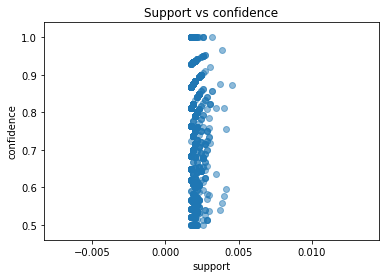

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df_rules_two['support'], df_rules_two['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs confidence')
plt.show()

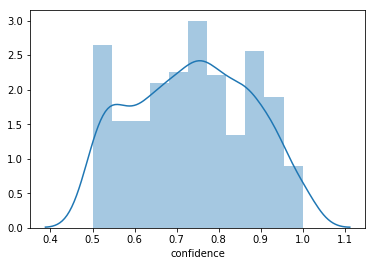

In [28]:
import seaborn as sns
sns.distplot(df_rules_two['confidence'])

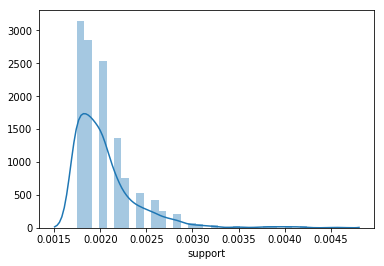

In [29]:
sns.distplot(df_rules_two['support'])

# visualization_true!

In [ ]:
pip install chart-studio 

In [ ]:
pip install visJS2jupyter

In [ ]:
pip install keras-vis

In [20]:
df_rules_two_confidence = df_rules_two.loc[df_rules_two['confidence'] >= 0.7] 
len(df_rules_two_confidence)

581

In [21]:
df_rules_two_support = df_rules_two.loc[df_rules_two['support']>=0.002]
len(df_rules_two_support)

493

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import visJS2jupyter.visJS_module 
import visJS2jupyter.visualizations as visualizations
import plotly.graph_objs as go
import networkx as nx
import numpy as np
import pandas as pd

import sys
sys.path.append('../src/')
import imp
imp.reload(visJS2jupyter.visJS_module)

<module 'visJS2jupyter.visJS_module' from 'C:\\Users\\hahas\\Anaconda3\\lib\\site-packages\\visJS2jupyter\\visJS_module.py'>

In [22]:
G = nx.from_pandas_edgelist(df_rules_two_confidence,source='antecedents',
                                   target='consequents',edge_attr ='confidence',
                                   create_using=nx.DiGraph())

In [54]:
G = nx.from_pandas_edgelist(df_rules_two_support,source='antecedents',
                                   target='consequents',edge_attr ='support',
                                   create_using=nx.Graph())

In [55]:
nodes = G.nodes()
edges = G.edges()
pos = nx.spring_layout(G, k=0.5, iterations=50)
for n, p in pos.items():
    G.node[n]['pos'] = p

In [56]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [57]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0][0])+'# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [53]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [58]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

# Maximal_cliques!

In [59]:
T= nx.from_pandas_edgelist(df_rules_two_confidence,source='antecedents',
                                   target='consequents',edge_attr ='confidence',
                                   create_using=nx.Graph())

In [60]:
# Define maximal_cliques()
def maximal_cliques(T,size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(T):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

In [61]:
largest_clique = sorted(nx.find_cliques(T), key=lambda x:len(x))[-1]
len(largest_clique)

12

In [62]:
maximal_cliques(T,12)

[[('B07JZRYFXD',),
  ('B075VYL591',),
  ('B00L5FYDC0',),
  ('B075VYD145',),
  ('B078HDBP3C',),
  ('B010352KBS',),
  ('B00JBEFSFS',),
  ('B076F2MMZS',),
  ('B07JCL2VQD',),
  ('B01MYUCJBF',),
  ('B01IS134SC',),
  ('B01HIP5KO0',)],
 [('B07JZRYFXD',),
  ('B075VYL591',),
  ('B00L5FYDC0',),
  ('B075VYD145',),
  ('B078HDBP3C',),
  ('B010352KBS',),
  ('B00JBEFSFS',),
  ('B076F2MMZS',),
  ('B07JCL2VQD',),
  ('B01MYUCJBF',),
  ('B01IS134SC',),
  ('B07BKTTBTK',)],
 [('B01ARRQJP0',),
  ('B00KNX315U',),
  ('B00LBA31XG',),
  ('B00F534C88',),
  ('B007M672AQ',),
  ('B01GFQO1BQ',),
  ('B06XSVQ58L',),
  ('B006ZS8VEI',),
  ('B07BZY27H9',),
  ('B07BYTY7CV',),
  ('B074XVN4TH',),
  ('B00N2ZUOY2',)],
 [('B01ARRQJP0',),
  ('B00KNX315U',),
  ('B00LBA31XG',),
  ('B00F534C88',),
  ('B007M672AQ',),
  ('B01GFQO1BQ',),
  ('B06XSVQ58L',),
  ('B006ZS8VEI',),
  ('B074LJ3MY7',),
  ('B074XVN4TH',),
  ('B07BYTY7CV',),
  ('B00N2ZUOY2',)],
 [('B01ARRQJP0',),
  ('B00KNX315U',),
  ('B00LBA31XG',),
  ('B00F534C88',),
  ('B007

In [63]:
b = []
for l in maximal_cliques(T,12):
    for i in l:
        if i not in b:
            b.append(i)
b

[('B07JZRYFXD',),
 ('B075VYL591',),
 ('B00L5FYDC0',),
 ('B075VYD145',),
 ('B078HDBP3C',),
 ('B010352KBS',),
 ('B00JBEFSFS',),
 ('B076F2MMZS',),
 ('B07JCL2VQD',),
 ('B01MYUCJBF',),
 ('B01IS134SC',),
 ('B01HIP5KO0',),
 ('B07BKTTBTK',),
 ('B01ARRQJP0',),
 ('B00KNX315U',),
 ('B00LBA31XG',),
 ('B00F534C88',),
 ('B007M672AQ',),
 ('B01GFQO1BQ',),
 ('B06XSVQ58L',),
 ('B006ZS8VEI',),
 ('B07BZY27H9',),
 ('B07BYTY7CV',),
 ('B074XVN4TH',),
 ('B00N2ZUOY2',),
 ('B074LJ3MY7',),
 ('B074LHLQ34',),
 ('B079YJPDW1',),
 ('B072KYWTGC',),
 ('B06XQ5THNT',)]

In [64]:
len(maximal_cliques(T,12))

8

In [65]:
largest_clique2 = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]
largest_clique2

[('B01ARRQJP0',),
 ('B07BYTY7CV',),
 ('B00KNX315U',),
 ('B00LBA31XG',),
 ('B00N2ZUOY2',),
 ('B007M672AQ',),
 ('B06XSVQ58L',),
 ('B00F534C88',),
 ('B074LJ3MY7',),
 ('B074XVN4TH',),
 ('B000BTUS4S',),
 ('B01GFQO1BQ',)]

In [66]:
maximal_cliques(G,12)

[[('B01ARRQJP0',),
  ('B07BYTY7CV',),
  ('B00KNX315U',),
  ('B00LBA31XG',),
  ('B00N2ZUOY2',),
  ('B007M672AQ',),
  ('B06XSVQ58L',),
  ('B00F534C88',),
  ('B074LJ3MY7',),
  ('B074XVN4TH',),
  ('B000BTUS4S',),
  ('B01GFQO1BQ',)]]

In [67]:
len(maximal_cliques(G,12))

1

# TF-IDF

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [68]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [69]:
undirected=['Next Level-Unisex Tri-Blend Three-Quarter Sleeve Raglan Tee-6051',
'Unisex Heather CVC T-Shirt (3001CVC)',
'Unisex Short Sleeve V-Neck Jersey Tee.',
'B8413 Canvas Ladies Triblend Short-Sleeve T-Shirt.',
'Unisex Crew Neck Triblend Short Sleeve Tee B00N2ZUOY2.',
'Boys Youth Jersey Short-Sleeve T-Shirt.',
'Unisex Poly-Cotton Fleece Pullover Hoodie Sweatshirt.',
'Unisex Jersey Long-Sleeve T-Shirt WHIT.',
'Ladies Flowy Racerback Tank.',
'Triblend Sideseamed V-Neck Fit T-Shirt.',
'Perfect Tri-Blend Fashionable T-Shirt.']

In [70]:
directed1 = ["""
Tide II Toe Post Sandal
Naot Women's Kyra Flat
Pacific Hightide Thong Sandal
FitFlop Women's Crystal Swirl Flip-Flop
Kona Fitness Shoes
Walker Shoes
Spark Minna Ballet Flat
Fitness Shoes
Gemma Mule Slipper
Adilyn Slipper- Ladies Adjustable Slippers with Concealed Orthotic Arch Support
Serena Ankle Boot
"""]

In [75]:
directed2 = ["""
Unisex Tri-Blend Three-Quarter Sleeve Raglan Tee
Unisex Short Sleeve V-Neck Jersey Tee 
Ladies' Triblend Short-Sleeve T-Shirt 
Perfect Tri-Blend Fashionable T-Shirt
Boys Youth Jersey Short-Sleeve T-Shirt Heather Red
Unisex Poly-Cotton Fleece Pullover Hoodie Sweatshirt 
Unisex Heather CVC T-Shirt 
Unisex Crew Neck Triblend Short Sleeve Tee
Unisex Jersey Short-Sleeve T-Shirt - White 
Triblend Sideseamed V-Neck Fit T-Shirt
Unisex Jersey Long-Sleeve T-Shirt WHITE XS Style 
Polyester/Cotton T-Shirt
Triblend Short-Sleeve Deep V-Neck T-Shirt
Toddler Jersey Tee
Short-Sleeve V-Neck Jersey Tee
"""]

In [71]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tdm = vectorizer.fit_transform(directed1)
print(vectorizer.get_feature_names())
print(tdm.shape)

['adilyn', 'adjustable', 'ankle', 'arch', 'ballet', 'boot', 'concealed', 'crystal', 'fitflop', 'fitness', 'flat', 'flip', 'flop', 'gemma', 'hightide', 'ii', 'kona', 'kyra', 'ladies', 'minna', 'mule', 'naot', 'orthotic', 'pacific', 'post', 'sandal', 'serena', 'shoes', 'slipper', 'slippers', 'spark', 'support', 'swirl', 'thong', 'tide', 'toe', 'walker', 'with', 'women']
(1, 39)


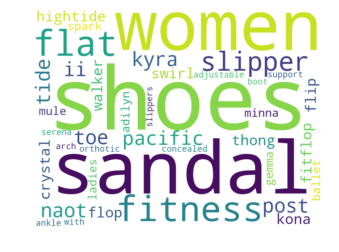

In [73]:
freqs = dict((word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items())
wordcloud = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(freqs)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

['blend', 'boys', 'cotton', 'crew', 'cvc', 'deep', 'fashionable', 'fit', 'fleece', 'heather', 'hoodie', 'jersey', 'ladies', 'long', 'neck', 'perfect', 'poly', 'polyester', 'pullover', 'quarter', 'raglan', 'red', 'shirt', 'short', 'sideseamed', 'sleeve', 'style', 'sweatshirt', 'tee', 'three', 'toddler', 'tri', 'triblend', 'unisex', 'white', 'xs', 'youth']
(1, 37)


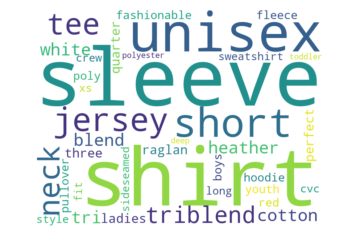

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tdm = vectorizer.fit_transform(directed2)
print(vectorizer.get_feature_names())
print(tdm.shape)

freqs = dict((word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items())
wordcloud = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(freqs)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

['3001cvc', '6051', 'b00n2zuoy2', 'b8413', 'blend', 'boys', 'canvas', 'cotton', 'crew', 'cvc', 'fashionable', 'fit', 'fleece', 'flowy', 'heather', 'hoodie', 'jersey', 'ladies', 'level', 'long', 'neck', 'next', 'perfect', 'poly', 'pullover', 'quarter', 'racerback', 'raglan', 'shirt', 'short', 'sideseamed', 'sleeve', 'sweatshirt', 'tank', 'tee', 'three', 'tri', 'triblend', 'unisex', 'whit', 'youth']
(11, 41)


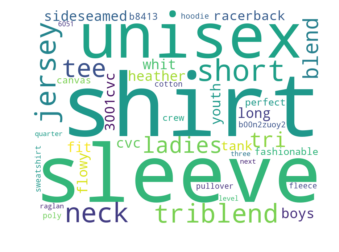

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tdm = vectorizer.fit_transform(undirected)
print(vectorizer.get_feature_names())
print(tdm.shape)

freqs = dict((word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items())
wordcloud = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(freqs)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sub-Graph (Maximal Clique Visualization)

In [145]:
nodes_of_interest = [('B01ARRQJP0',),
  ('B07BYTY7CV',),
  ('B00N2ZUOY2',),
  ('B00LBA31XG',),
  ('B00KNX315U',),
  ('B01GFQO1BQ',),
  ('B074LJ3MY7',),
  ('B000BTUS4S',),
  ('B074XVN4TH',),
  ('B00F534C88',),
  ('B06XSVQ58L',),
  ('B007M672AQ',)]

In [146]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

C:\Users\hahas\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



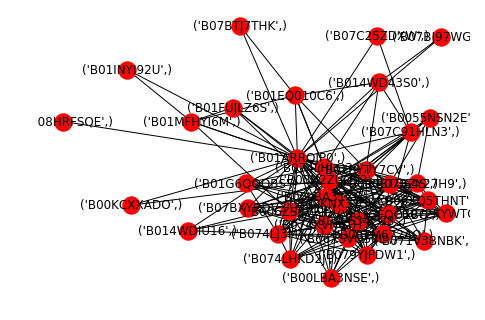

In [148]:
# Extract the subgraph with the nodes of interest: T_draw
Graph_sub = get_nodes_and_nbrs(T,nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(Graph_sub,with_labels=True)
plt.show()

In [186]:
def get_nodes_and_nbrs2(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []

    # Iterate over the nodes of interest
    for n in nodes_of_interest:

        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)

        # Iterate over all the neighbors of node n
        for nbr in G.successors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)

    return G.subgraph(nodes_to_draw)

In [190]:
nodes_of_interest = [('B01G6QQQBS',)]

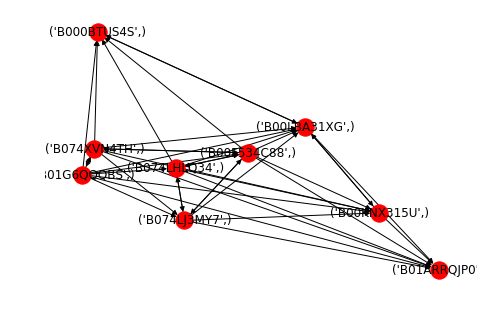

In [191]:
# Extract the subgraph with the nodes of interest: T_draw
Graph_sub = get_nodes_and_nbrs(diGraph,nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(Graph_sub,with_labels=True)
plt.show()

# Connected_component_ SubGraph

In [83]:
nx.connected_component_subgraphs(T)

<generator object connected_component_subgraphs at 0x0000023336FC2138>

In [84]:
for g in list(nx.connected_component_subgraphs(T)):
    print(len(g.nodes()))

45
7
2
2
18
9
5
2
22
7
2
2
2
2
2
2


In [85]:
ccs=[]
for g in list(nx.connected_component_subgraphs(T)):
    if len(g.nodes()) == 18:
        ccs.append(g.nodes())
ccs

[NodeView((('B00JJ19F0C',), ('B01MQJXTD9',), ('B06XYX29SX',), ('B07C68TP6F',), ('B06Y4FTDT8',), ('B004TZOEF4',), ('B06Y43J841',), ('B00VXO4QWK',), ('B071VGPD9X',), ('B06Y4CJVQY',), ('B06Y4C2RS9',), ('B0096E59S4',), ('B07CF5V77B',), ('B01N2YOQOB',), ('B06Y4BVY5P',), ('B07JYGCXF1',), ('B07JWGHS6C',), ('B079S9LD5V',)))]

In [90]:
nx.connected_component_subgraphs(G)

<generator object connected_component_subgraphs at 0x0000023336FC20C0>

In [91]:
for g in list(nx.connected_component_subgraphs(G)):
    print(len(g.nodes()))

48
12
13
17
2
4
2
2
2
2
2


In [92]:
ccs=[]
for g in list(nx.connected_component_subgraphs(G)):
    if len(g.nodes())==13:
        ccs.append(g.nodes())
ccs

[NodeView((('B00JJ19F0C',), ('B07C68TP6F',), ('B06XYX29SX',), ('B06Y4FTDT8',), ('B004TZOEF4',), ('B00VXO4QWK',), ('B071VGPD9X',), ('B06Y4CJVQY',), ('B06Y4C2RS9',), ('B0096E59S4',), ('B06Y4BVY5P',), ('B07JYGCXF1',), ('B07JWGHS6C',)))]

# Product_Classification!

## Closeness_centrality

In [25]:
diGraph = nx.from_pandas_edgelist(df_rules_two_confidence,source='antecedents',
                                   target='consequents',edge_attr ='confidence',
                                   create_using=nx.DiGraph())

In [26]:
Graph = nx.from_pandas_edgelist(df_rules_two_support,source='antecedents',
                                   target='consequents',edge_attr ='support',
                                   create_using=nx.Graph())

In [95]:
closeness_centrality = nx.closeness_centrality(diGraph)

In [104]:
starred_items = []
for key, value in closeness_centrality.items():
  if value >= 0.15:
    for k in key:
      if k not in starred_items:
        starred_items.append(k)
print(starred_items)

['B00LBA31XG', 'B07BYTY7CV', 'B00N2ZUOY2', 'B00KNX315U', 'B01ARRQJP0', 'B078HDBP3C']


In [105]:
len(starred_items)

6

In [106]:
least_items = []
for k, v in closeness_centrality.items():
  if v> 0 and v <= 0.008:
    for i in k:
      if i not in least_items:
        least_items.append(i)
print(least_items)

['B002AQRVZE', 'B00XKXHMD2', 'B015XBYDLM', 'B07CQS2QMZ', 'B06XWNF6BM', 'B07BHQLZSX', 'B07DC8BR3B', 'B07G7R1PZM', 'B07C91HLN3', 'B07G7DNKT1', 'B00ROY5VRC', 'B00SG7CNW2', 'B07MDCXPHC', 'B01INYI92U', 'B01LFE7FCU', 'B073Z7Y7LM', 'B01LWQM6MU', 'B01MR5I9V9', 'B01M6C5O7Z', 'B01MRECHLD', 'B07D926L1B', 'B07DLRRKY7']


In [107]:
len(least_items)

22

## betweenness_centrality

In [100]:
betweenness_centrality = nx.betweenness_centrality(diGraph)

In [101]:
len(betweenness_centrality)

131

In [102]:
sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[0:20]

[(('B007M672AQ',), 0.01247720195394614),
 (('B00LBA31XG',), 0.010176885990839478),
 (('B074LHLQ34',), 0.00620193329495655),
 (('B00F534C88',), 0.005554331542703635),
 (('B00KNX315U',), 0.005228630112351042),
 (('B00JBEFSFS',), 0.00346099421680817),
 (('B01EQ010C6',), 0.003041144901610018),
 (('B07BZY27H9',), 0.0028513927932532586),
 (('B074XVN4TH',), 0.002650572941270616),
 (('B06XSVQ58L',), 0.002438532612951219),
 (('B00L5FYDC0',), 0.002072744223907015),
 (('B01GFQO1BQ',), 0.0016522323499067685),
 (('B00N2ZUOY2',), 0.0015911349632279864),
 (('B07C91HLN3',), 0.0015503875968992248),
 (('B01IS134SC',), 0.001412457051991936),
 (('B07JCL2VQD',), 0.0012496332263774125),
 (('B006ZS8VEI',), 0.001166529422343376),
 (('B074LJ3MY7',), 0.0011258465909628698),
 (('B0741QK3WM',), 0.0008348240906380441),
 (('B06XQ5THNT',), 0.0007966645757343434)]

In [111]:
b_starred_items = []
for key, value in betweenness_centrality.items():
    if value >= 0.001:
        for k in key:
            if k not in b_starred_items:
                b_starred_items.append(k)
print(b_starred_items)

['B007M672AQ', 'B00F534C88', 'B00LBA31XG', 'B06XSVQ58L', 'B074LHLQ34', 'B074XVN4TH', 'B07BZY27H9', 'B00N2ZUOY2', 'B006ZS8VEI', 'B00KNX315U', 'B01GFQO1BQ', 'B074LJ3MY7', 'B00JBEFSFS', 'B00L5FYDC0', 'B01IS134SC', 'B07JCL2VQD', 'B01EQ010C6', 'B07C91HLN3']


In [113]:
len(b_starred_items)

18

In [114]:
b_least_items = []
for k, v in betweenness_centrality.items():
  if v> 0 and v <= 0.001:
    for i in k:
      if i not in b_least_items:
        b_least_items.append(i)
print(b_least_items)

['B000BTUS4S', 'B01G6QQQBS', 'B06XQ5THNT', 'B07BYTY7CV', 'B0045I6IAO', 'B06Y4C2RS9', 'B0741QK3WM', 'B01MFHYI6M', 'B079YJPDW1', 'B07BHQLZSX', 'B06Y4BVY5P', 'B07C68TP6F', 'B00CQFJXY6', 'B078BF1ZQ6', 'B00H95VSF0', 'B00L5FY6HC', 'B010352KBS', 'B01HIP5KO0', 'B01MYUCJBF', 'B075VYD145', 'B075VYL591', 'B076F2MMZS', 'B07BKTTBTK', 'B07G8LX1C2', 'B07JZRYFXD', 'B00JJ19F0C', 'B071VGPD9X', 'B07JWGHS6C', 'B07G7R1PZM', 'B07MDCXPHC', 'B014WD43S0', 'B01INYI92U', 'B06Y4FTDT8']


In [115]:
len(b_least_items)

33

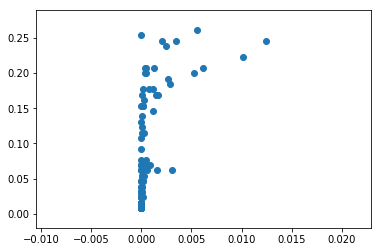

In [117]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(diGraph)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(diGraph)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()),list(deg_cen.values()))

# Display the plot
plt.show()

## in-degree & out-degree

In [118]:
sorted(diGraph.in_degree, key=lambda x: x[1], reverse=True)[0:20]

[(('B01ARRQJP0',), 33),
 (('B00LBA31XG',), 23),
 (('B00KNX315U',), 22),
 (('B07BYTY7CV',), 21),
 (('B078HDBP3C',), 20),
 (('B00N2ZUOY2',), 19),
 (('B00JBEFSFS',), 18),
 (('B075VYL591',), 18),
 (('B00L5FYDC0',), 17),
 (('B007M672AQ',), 15),
 (('B00F534C88',), 15),
 (('B01GFQO1BQ',), 15),
 (('B076F2MMZS',), 15),
 (('B000BTUS4S',), 13),
 (('B06XSVQ58L',), 13),
 (('B010352KBS',), 12),
 (('B01MYUCJBF',), 12),
 (('B075VYD145',), 12),
 (('B07JCL2VQD',), 12),
 (('B07JZRYFXD',), 11)]

In [119]:
sorted(diGraph.out_degree, key=lambda x: x[1], reverse=True)[0:20]

[(('B00F534C88',), 19),
 (('B06XSVQ58L',), 18),
 (('B074LHLQ34',), 18),
 (('B007M672AQ',), 17),
 (('B074XVN4TH',), 16),
 (('B06XQ5THNT',), 15),
 (('B07BZY27H9',), 15),
 (('B00L5FYDC0',), 15),
 (('B010352KBS',), 15),
 (('B07JCL2VQD',), 15),
 (('B006ZS8VEI',), 14),
 (('B00JBEFSFS',), 14),
 (('B01MYUCJBF',), 14),
 (('B075VYD145',), 14),
 (('B01HIP5KO0',), 13),
 (('B01IS134SC',), 13),
 (('B072KYWTGC',), 12),
 (('B079YJPDW1',), 12),
 (('B00L5FY6HC',), 12),
 (('B076F2MMZS',), 12)]

# BFS

In [ ]:
def BFS(G,roots):
    result = {}
    for root in roots:
        n_distance_neighbors = {}      
        visited = set()
        visited.add(root)
        stores = []
        stores.append({root:0})
        stores_per = []
        stores.append({root:0})
        while len(stores) > 0:
            value = list(stores[0].values())[0]
            current_node = list(stores.pop(0).keys())[0]
            for neighbor in G.neighbors(current_node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    stores.append({neighbor:value+1})
                    stores_per.append({neighbor:value+1})
                    
        n_distance_neighbors[0] = root
        distance = 1
        while distance <= value+1:
            neighbors_list = []
            for node in stores_per:
                if list(node.values())[0] == distance:
                    neighbors_list.append(list(node.keys())[0])
            if len(neighbors_list) > 0:
                n_distance_neighbors[distance] = neighbors_list
            distance = distance + 1      
        result[root] = n_distance_neighbors
    return result

In [111]:
a = []
#a.append(('B01MFHYI6M',))
a.append(('B01G6QQQBS',))
BFS(diGraph,a)

{('B01G6QQQBS',): {0: ('B01G6QQQBS',),
  1: [('B000BTUS4S',),
   ('B00F534C88',),
   ('B00KNX315U',),
   ('B00LBA31XG',),
   ('B01ARRQJP0',),
   ('B074LHLQ34',),
   ('B074LJ3MY7',),
   ('B074XVN4TH',)],
  2: [('B07BYTY7CV',),
   ('B006ZS8VEI',),
   ('B007M672AQ',),
   ('B00LBA3NSE',),
   ('B00N2ZUOY2',),
   ('B01GFQO1BQ',),
   ('B06XQ5THNT',),
   ('B06XSVQ58L',),
   ('B072KYWTGC',),
   ('B074LHKD2J',),
   ('B079YJPDW1',),
   ('B07BZY27H9',),
   ('B014WD43S0',),
   ('B01EQ010C6',),
   ('B01MFHYI6M',),
   ('B071V3BNBK',)],
  3: [('B0055NSN2E',), ('B07BTJ7THK',)]}}

In [122]:
tes = BFS(diGraph,a)

In [123]:
from collections import defaultdict
d = defaultdict(list)
for keys,values in tes.items():
    d[keys].append(values)

In [124]:
lifts = []
for keys,values in d.items():
    for items in values:
        for i in range(len(items)):
            for t in range(len(items[i])):                
                a=[items[i][t],df_rules_two.loc[(df_rules_two['antecedents'] == keys) & (df_rules_two['consequents'] == items[i][t]), "lift"]]  
                lifts.append(a)

In [125]:
lifts

[['B00F534C88', Series([], Name: lift, dtype: float64)],
 [('B000BTUS4S',), 5    192.543103
  Name: lift, dtype: float64],
 [('B006ZS8VEI',), 95    316.4125
  Name: lift, dtype: float64],
 [('B007M672AQ',), 129    319.071429
  Name: lift, dtype: float64],
 [('B00KNX315U',), 204    252.598214
  Name: lift, dtype: float64],
 [('B00LBA31XG',), 206    252.598214
  Name: lift, dtype: float64],
 [('B00LBA3NSE',), 208    372.25
  Name: lift, dtype: float64],
 [('B00N2ZUOY2',), 209    174.492187
  Name: lift, dtype: float64],
 [('B01ARRQJP0',), 210    128.855769
  Name: lift, dtype: float64],
 [('B01GFQO1BQ',), 214    268.02
  Name: lift, dtype: float64],
 [('B06XQ5THNT',), 216    260.575
  Name: lift, dtype: float64],
 [('B06XSVQ58L',), 218    352.657895
  Name: lift, dtype: float64],
 [('B072KYWTGC',), 222    260.575
  Name: lift, dtype: float64],
 [('B074LHKD2J',), 224    347.433333
  Name: lift, dtype: float64],
 [('B074LHLQ34',), 226    279.1875
  Name: lift, dtype: float64],
 [('B074LJ3M

# Popular Product Association!

In [126]:
from efficient_apriori import apriori
itemsets2, rules2 = apriori(lst, min_support=0.0020)

In [127]:
len(rules2)

35684

In [128]:
import pandas as pd
d = []
for rule in rules2:
    d.append({'antecedents': rule.lhs, 'consequents': rule.rhs,
                     'antecedent_support':rule.count_lhs / rule.num_transactions,
                     'consequent_support':rule.count_rhs / rule.num_transactions,
                     'support':rule.support,
                     'confidence':rule.confidence,
                     'lift':rule.lift,
                     'conviction':rule.conviction})

df_rules = pd.DataFrame(d)

In [130]:
df_rules = df_rules.reindex(columns=['antecedents', 'consequents', 
              'antecedent_support',
              'consequent_support',
              'support','confidence','lift','conviction'])

In [131]:
df_rules.sort_values(by='consequent_support', ascending=False)

,antecedents,consequents,antecedent_support,consequent_support,support,confidence,lift,conviction
53,"(B006XISCNA,)","(B07DC8BR3B,)",0.003895,0.009940,0.002418,0.620690,62.446412,2.610159e+00
42,"(B004QWYCVG,)","(B07DC8BR3B,)",0.004835,0.009940,0.002821,0.583333,58.688063,2.376145e+00
132,"(B00FMWWN6U,)","(B07DC8BR3B,)",0.005238,0.009940,0.004567,0.871795,87.709633,7.722471e+00
280,"(B00PUDI2Z2,)","(B07DC8BR3B,)",0.003492,0.009940,0.002418,0.692308,69.651767,3.217696e+00
279,"(B00NWGWPSO,)","(B07DC8BR3B,)",0.003224,0.009940,0.002015,0.625000,62.880068,2.640161e+00
34,"(B002QYW8LW,)","(B07DC8BR3B,)",0.004164,0.009940,0.002149,0.516129,51.926765,2.046125e+00
325,"(B015XBYDLM,)","(B07DC8BR3B,)",0.005104,0.009940,0.002955,0.578947,58.246799,2.351394e+00
256,"(B00MRZIFD0,)","(B07DC8BR3B,)",0.004298,0.009940,0.002686,0.625000,62.880068,2.640161e+00
34172,"(B006ZS8VEI, B007M672AQ, B00F534C88, B00LBA31X...","(B01ARRQJP0,)",0.002015,0.006985,0.002015,1.000000,143.173077,9.930154e+08
1624,"(B00KNX315U, B014WD43S0)","(B01ARRQJP0,)",0.002283,0.006985,0.002283,1.000000,143.173077,9.930154e+08


In [132]:
df_rules.sort_values(by='antecedent_support', ascending=False)

,antecedents,consequents,antecedent_support,consequent_support,support,confidence,lift,conviction
331,"(B01ARRQJP0,)","(B01MFHYI6M,)",0.006985,0.004970,0.004030,0.576923,116.086279,2.351890e+00
341,"(B01ARRQJP0,)","(B07BYTY7CV,)",0.006985,0.005507,0.004164,0.596154,108.252814,2.462554e+00
309,"(B01ARRQJP0,)","(B014WD43S0,)",0.006985,0.004030,0.003895,0.557692,138.400641,2.251759e+00
259,"(B01ARRQJP0,)","(B00N2ZUOY2,)",0.006985,0.004298,0.003761,0.538462,125.276442,2.157354e+00
194,"(B07BYTY7CV,)","(B00KNX315U,)",0.005507,0.003761,0.002821,0.512195,136.189024,2.042290e+00
323,"(B07BYTY7CV,)","(B014WD43S0,)",0.005507,0.004030,0.002955,0.536585,133.162602,2.149199e+00
1679,"(B07BYTY7CV,)","(B00KNX315U, B01ARRQJP0)",0.005507,0.003224,0.002821,0.512195,158.887195,2.043392e+00
27,"(B07BYTY7CV,)","(B000BTUS4S,)",0.005507,0.003895,0.002821,0.512195,131.492851,2.042015e+00
362,"(B07BYTY7CV,)","(B01GFQO1BQ,)",0.005507,0.003358,0.002821,0.512195,152.531707,2.043116e+00
274,"(B07BYTY7CV,)","(B00N2ZUOY2,)",0.005507,0.004298,0.003492,0.634146,147.538110,2.721585e+00


# Recommendation

In [140]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())

top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[(('B000BTUS4S',), ('B006ZS8VEI',)), (('B006ZS8VEI',), ('B074LJ3MY7',)), (('B00F534C88',), ('B06XQ5THNT',)), (('B00N2ZUOY2',), ('B07BZY27H9',)), (('B01GFQO1BQ',), ('B06XQ5THNT',)), (('B01GFQO1BQ',), ('B074LHLQ34',)), (('B074LHLQ34',), ('B074XVN4TH',)), (('B074XVN4TH',), ('B07BZY27H9',))]
